# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset includes information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient and appointment are included in each row:


>1. - **PatientId:** Identification of a patient 
>2. - **AppointmentID:** Identification of each appointment
>3. - **Gender:** Male or Female. 
>4. - **ScheduledDay:** The day of the actuall appointment, when they have to visit the doctor.
5. - **AppointmentDay:** The day someone called or registered the appointment, this is before appointment.
6. - **Age:** How old is the patient.
7. - **Neighbourhood:** Where the appointment takes place.
8. - **Scholarship:** True of False. This indicates whether or not the patient is enrolled in the Brasilian welfare program- Bolsa Família.
9. - **Hipertension (Hypertension):** True or False
10. - **Diabetes:** True or False
11. - **Alcoholism:** True or False
12. - **Handcap(Handicap):** True or False
13. - **SMS_received:** 1 or more messages sent to the patient.
14. - **No-show:** True or False. It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 

### Research Questions
The following research questions have been raised from the dataset;
1. Which gender is more likely to show up for their appointments?
2. What is the probability that a handicap will not show up for their appointment?

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [125]:
# Loading the dataset and viewing the first few rows to get an overview of its features
nsa = pd.read_csv('no-show-appointments.csv')
nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [126]:
#number of rows and colums
nsa.shape

(110527, 14)

In [127]:
# Are there duplicate rows?
nsa.duplicated().sum()

0

In [128]:
# A look at the table above shows there are features we don't need. Hence, they will be dropped
nsa.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [129]:
# Correct column spelling errors. Although 'No-show' is spelt coreectly. it has been edited for uniformity by replacing '-' with '_'
nsa.rename(columns= {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'No_show'}, inplace=True)

In [130]:
# check for dropped columns and spelling correctness
nsa.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [131]:
# current number of rows and colums after dropping some
nsa.shape

(110527, 12)

In [132]:
# A descriptive summary of the dataset. It can be observed that the max 'Handicap' is 4. This will be investigated because
# the column should contain either False(0) or True(1) (according to the original dataset on kaggle).
nsa.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [133]:
# Investigating the issue from 'Handicap' discovered above. it can be seen that not just 4 but the numbers 2 and 3 are also well
#represented in the dataset. The question here is- does this mean these people had multiple handicaps (2/3/4 handicaps) or 
# they are simply handicap? I will go with the latter which is in line with what is stated in the 'about page' of the original
# dataset on kaggle - it should simply be True(1) or False(0).
# Hence, 'Handicap' values above 1 will be converted to 1
nsa.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [134]:
# Converting values in 'Handicap' to make all values greater than 1 == 1 to signify True.
nsa.loc[nsa['Handicap'] > 1, 'Handicap'] = 1

In [135]:
#check to see correct 'Handicap' values
nsa.Handicap.unique()

array([0, 1], dtype=int64)

In [136]:
# Does the dataset contain null values? Since all rows match the total number of rows- there are none.
nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hypertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handicap        110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No_show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


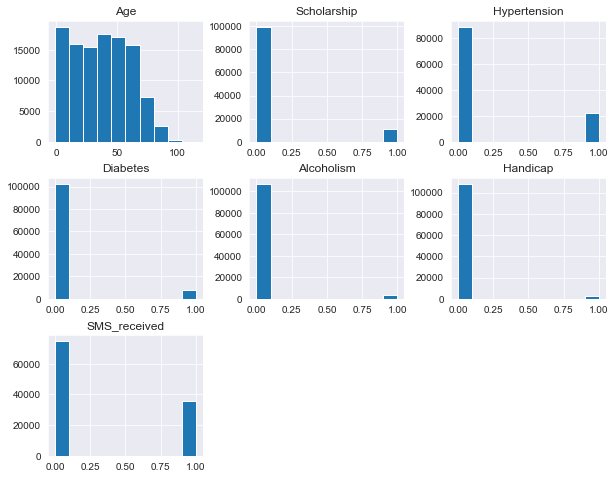

In [137]:
# Visual distribution of the variables in the dataset. 
nsa.hist(figsize=(10,8));

>**From the histograms above. It can be seen that about half of them received at least 1 SMS alert prior to their appointment. A quarter of the patients are also hypertensive and much less than that have diabetes or drinking problems.**

<a id='eda'></a>
## Exploratory Data Analysis

>This section looks to explore the research questions posed in the introduction.

### Research Question 1 (Which gender is more likely to show up for their appointments?)

In [138]:
# Distinction of genders from the dataset
females = nsa[nsa['Gender'] == 'F']
males = nsa[nsa['Gender'] == 'M']

In [139]:
# Distinction of genders from the dataset in relation to whether they showed up or not
showed = nsa.groupby(['Gender', 'No_show'])['Gender'].count()
showed

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Gender, dtype: int64

In [140]:
# Extraction of information for variable assignments and analysis

no_show_f = showed[1]                 #Females that did not show up
f_that_showed = showed[0]             #Females that showed up
total_f = (no_show_f + f_that_showed) #Total females

no_show_m = showed[3]                 #Males that did not show up
m_that_showed = showed[2]             #Males that showed up
total_m = (no_show_m + m_that_showed) #Total males


In [141]:
# Bar graph function definition
positions = [1,2]
labels = ['Females', 'Males']
f_and_m_that_showed = [f_that_showed, m_that_showed] 
colors = ['pink', 'blue']

def bar_graph(position, heights, x, y, t): 
    """ creates a bar chart containing 2 bars.
    
    Parameters
    ----------
    position : [int,int]
        position of bars 
    heights : [int,int]
        values to be placed at the positions
    x : str
        xlabel
    y : str
        ylabel
    t : str
        title of the graph
        
    Returns
    -------
    A bar graph containing 2 variables
    
    """
    plot = plt.bar(position, heights, color=colors, tick_label=labels, edgecolor="black")
    xlab = plt.xlabel(x)
    ylab = plt.ylabel(y)
    title = plt.title(t)
    return plot, xlab, ylab, title

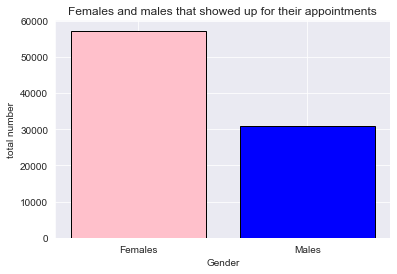

In [142]:
# Calling the bar_graph function
bar_graph(positions, f_and_m_that_showed, 'Gender', 'total number', 'Females and males that showed up for their appointments');

>**The bar graph above clearly shows that almost a 100% more women had medical appointments. However, this doesn't answer whether women are more likely to show up for their medical appointments. This will have to be investigated further.** 

In [143]:
# Percentage of females that showed up for their appointments in relation to the total appointments made by females

percent_f = (f_that_showed / total_f) * 100
percent_f

79.68541202672606

In [144]:
# Percentage of males that showed up for their appointments in relation to the total appointments made by males
percent_m = (m_that_showed / total_m) * 100
percent_m

80.03205211052808

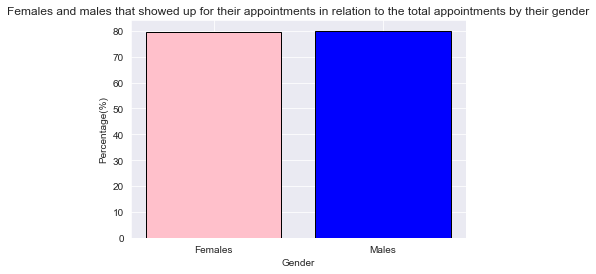

In [145]:
# calling the bar_graph function to reveal the likelihood of a female and male to show up for their appointments in relation to the total
# appointments by their gender

percent = [percent_f, percent_m]

bar_graph(positions, percent, 'Gender', 'Percentage(%)', 'Females and males that showed up for their appointments in relation to the total appointments by their gender');

>**Contrary to what was observed in the previous grapgh, we now see that women and men both have about an 80% chance of coming for their appointments, which is a fairly good rate of attendance.**

### Research Question 2  (What is the probability that a handicap will not show up for their appointment?)

In [146]:
# Creation of dataframes to distinguish handicaps from those that aren't
is_handicap = nsa[nsa['Handicap'] == 1]
isnt_handicap = nsa[nsa['Handicap'] == 0]

In [147]:
# Counting them and assigning the values to variables
is_handicap_count = is_handicap['Handicap'].count()
isnt_handicap_count = isnt_handicap['Handicap'].count()
is_handicap_count, isnt_handicap_count

(2241, 108286)

In [148]:
# Barh_graph function definition
positions = [1,2]
labels= ['Handicap', 'Not Handicap']
values= [is_handicap_count, isnt_handicap_count]
colors = ['red', 'blue']

def barh_graph(position, heights, x, y, t): 
    """ creates a horizontal bar chart containing 2 bars.
    
    Parameters
    ----------
    position : [int,int]
        position of bars 
    heights : [int,int]
        values to be placed at the positions
    x : str
        xlabel
    y : str
        ylabel
    t : str
        title of the graph
        
    Returns
    -------
    A detailed horizontal bar graph containing 2 variables
    
    """
    plot = plt.barh(position, heights, color=colors, tick_label=labels, edgecolor="black")
    xlab = plt.xlabel(x)
    ylab = plt.ylabel(y)
    title = plt.title(t)
    return plot, xlab, ylab, title

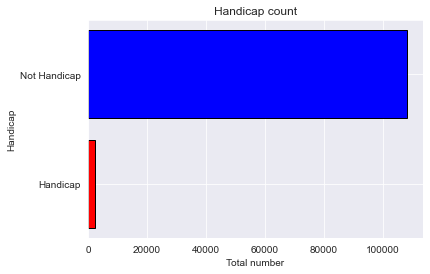

In [149]:
# Calling the barh_graph function  to compare the totals
barh_graph(positions, values, 'Total number', 'Handicap', 'Handicap count');

>**At less than 5,000, there aren't many handicaps when compared to those that are not handicapped who are over 110,000.**

In [150]:
# Grouping by handicaps to reveal the number that showed up and those that did not.
handicaps = is_handicap.groupby(['No_show'])['No_show'].count()
handicaps

No_show
No     1834
Yes     407
Name: No_show, dtype: int64

In [151]:
# variable assignments after extracting information from the code cells above
handicap_that_showedup = handicaps[0]
handicap_that_didntshow = handicaps[1]
hand_chance_of_noshow = (handicap_that_didntshow / is_handicap_count) * 100
hand_chance_of_noshow

18.16153502900491

In [152]:
# Grouping those that are not handicapped to reveal the number that showed up and those that did not.
not_hadicaps = isnt_handicap.groupby(['No_show'])['No_show'].count()
not_hadicaps

No_show
No     86374
Yes    21912
Name: No_show, dtype: int64

In [153]:
# variable assignments after extracting information from the code cells above
isnt_handicap_that_showedup = not_hadicaps[0]
isnt_handicap_that_didntshow = not_hadicaps[1]
isnt_hand_chance_of_noshow = (isnt_handicap_that_didntshow / isnt_handicap_count) * 100
isnt_hand_chance_of_noshow

20.235302809227417

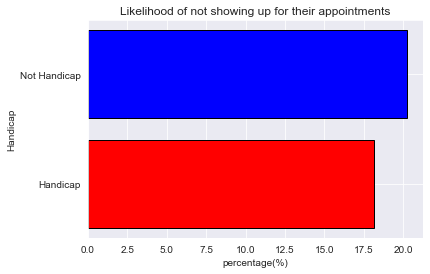

In [154]:
# Calling the barh_graph function to compare the likelihood of no shows

values = [hand_chance_of_noshow, isnt_hand_chance_of_noshow]

barh_graph(positions, values, 'percentage(%)', 'Handicap', 'Likelihood of not showing up for their appointments');

>**The horizontal bar gragh shows that there is an almost equal chance that a person that is handicap will _not_ make it to a medical appointment as a person that is not handicapped. In fact, those that are not handicap have about a 2% greater chance of not showing up for their appointments.**

<a id='conclusions'></a>
## Conclusions

>**In conclusion, we have seen women tend to visit the hospital more than men. Nonetheless, they both have the close to the same chance of showing up for their appointments. The likelihood of missing an appointment due to a physical impairment was also investigated and a surprising observation that those that had no physical disabilities were about 2% less likely to make it to their appointments.**

### Limitations

>1. The dataset does not state the specific reason(s) why a patient did not show up.
>2. Only 3 features (Gender, Handicap, No_show) from a possible 14 have been analysed. If investigated, these other features could hold much deeper insights.